In [2]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import math

data = pd.read_csv('인사이콘3_Data.csv')
data.head()

,RESPID,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,23822,5,1,5,5,5,5,5,3,5,...,4,4,4,4,5,4,4,4,0,1
1,224795,3,2,4,4,4,4,5,3,4,...,4,3,3,4,3,3,3,3,1,1
2,20952,3,1,4,4,5,4,4,2,4,...,5,3,3,5,2,4,3,5,1,0
3,5612,5,2,3,4,5,5,3,3,3,...,4,4,4,4,2,5,5,4,1,0
4,15016,4,2,4,5,5,4,5,4,5,...,4,4,5,5,3,4,5,4,0,0


In [3]:
#데이터 정규화
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data.iloc[:,1:]),columns=data.columns[1:])
data.head()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,1.186104,-1.861074,1.846000,1.353462,1.560841,1.268743,1.477733,-0.903108,1.964225,0.679611,...,0.038515,0.115106,0.097700,0.015707,1.826135,0.406008,0.137651,0.439300,-0.709559,1.003205
1,-1.254650,-0.874417,0.866411,0.133568,0.482588,0.055219,1.477733,-0.903108,1.034968,0.679611,...,0.038515,-1.228438,-1.290331,0.015707,-0.336778,-0.739529,-1.188421,-0.740977,1.409326,1.003205
2,-1.254650,-1.861074,0.866411,0.133568,1.560841,0.055219,0.362994,-2.128008,1.034968,-0.393800,...,1.445548,-1.228438,-1.290331,1.441031,-1.418234,0.406008,-1.188421,1.619576,1.409326,-0.996806
3,1.186104,-0.874417,-0.113177,0.133568,1.560841,1.268743,-0.751746,-0.903108,0.105710,0.679611,...,0.038515,0.115106,0.097700,0.015707,-1.418234,1.551545,1.463723,0.439300,1.409326,-0.996806
4,-0.034273,-0.874417,0.866411,1.353462,1.560841,0.055219,1.477733,0.321792,1.964225,0.679611,...,0.038515,0.115106,1.485731,1.441031,-0.336778,0.406008,1.463723,0.439300,-0.709559,-0.996806


# Part 2

In [47]:
# Q2 ~ Q10
Q2 = data.iloc[:,29:46]
Q2.drop('Q3', axis=1, inplace=True)
Q2.head()

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Q2,Q2.Cluster,Q4,Q5,Q6,Q7.1,Q7.2,Q7.3,Q7.4,Q8,Q9.1,Q9.2,Q9.3,Q9.4,Q9.5,Q10
0,0.125422,0.587613,3.074166,1.780707,6.293197,-0.208793,-0.898219,-0.709451,-0.768566,0.859211,-0.460576,0.557970,0.293257,0.689225,0.471260,1.218726
1,0.125422,0.587613,-0.397732,3.075726,0.203237,-0.208793,0.892490,0.175161,1.510797,-0.387288,-0.460576,0.557970,0.293257,1.544071,0.471260,-0.368565
2,0.125422,0.587613,0.470243,3.075726,-0.171529,-1.105488,-1.793573,0.175161,0.371116,0.859211,-0.460576,0.557970,0.293257,0.689225,0.471260,-0.368565
3,0.125422,0.587613,0.904230,3.075726,-0.077838,0.687902,-0.002865,-0.709451,0.371116,-0.387288,0.342648,-1.329666,0.293257,-0.165621,-1.434784,-0.368565
4,0.125422,0.587613,0.470243,3.075726,0.109546,-1.105488,-0.002865,-0.709451,-0.768566,-0.387288,-0.460576,-0.385848,-0.747009,-0.165621,-0.481762,-0.368565


## Choose the number of the factors

In [48]:
cov_mat = np.cov(Q2.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.78597719e-02 -5.83842758e-01  1.83595819e-01  1.96024944e-01
  -6.85322913e-01  1.17640924e-01 -5.32537868e-02  3.17786403e-02
   3.64060446e-02  5.72284373e-02 -2.11007113e-01 -7.95883923e-02
   1.98706011e-02  9.91605599e-02 -1.82908627e-01  1.34424294e-02]
 [ 1.42665159e-02 -5.90200378e-01  2.49939726e-01  1.58336741e-01
   7.08906535e-01  4.72521608e-02  9.71455901e-02 -3.18319766e-03
  -5.58621661e-02  5.83276281e-02 -1.41941151e-01 -6.44374092e-02
  -1.85761344e-02  5.71727948e-02 -1.22360260e-01  1.68211696e-02]
 [-1.34269216e-01 -7.80718558e-02 -3.27300710e-01  4.22061577e-01
  -8.12417554e-03 -2.37140555e-01  5.29857584e-03  1.76748572e-02
  -1.12306426e-01  1.46217003e-01  7.46484739e-02  1.61135498e-01
  -6.75683981e-02 -6.94326911e-01 -2.39552929e-01  1.56213223e-01]
 [-1.68075828e-01 -1.76842407e-01 -3.52495553e-01  1.55273309e-01
   1.11196248e-02  5.88576693e-02  1.02373871e-02 -5.26980364e-02
  -4.24256211e-02 -1.69422387e-02 -1.28507737e-01  4.538637

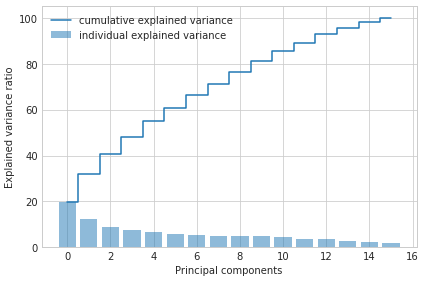

In [49]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(Q2.columns)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(Q2.columns)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [50]:
print(f'eigenvalue>1인 성분의 개수 {len([val for val in eig_vals if val>1])}')

eigenvalue>1인 성분의 개수 5


In [51]:
items = Q2.columns.tolist()
fa = FactorAnalyzer(n_factors=5, method="ml", rotation="promax")
fa.fit(Q2[items])

FactorAnalyzer(method='ml', n_factors=5, rotation_kwargs={})

<AxesSubplot:>

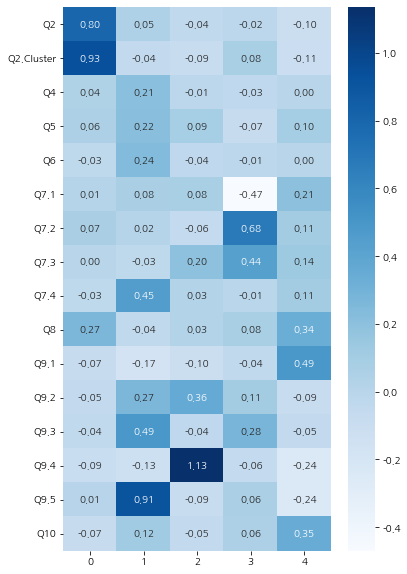

In [52]:
efa_result= pd.DataFrame(fa.loadings_, index=items)
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [53]:
groups = [[] for _ in range(5)]
for i in range(len(efa_result)):
    groups[np.argmax(efa_result.iloc[i])].append(efa_result.index[i])
for i, group in enumerate(groups):
    print(f'Group {i}:')
    print(group)

Group 0:
['Q2', 'Q2.Cluster']
Group 1:
['Q4', 'Q5', 'Q6', 'Q7.4', 'Q9.3', 'Q9.5']
Group 2:
['Q9.2', 'Q9.4']
Group 3:
['Q7.2', 'Q7.3']
Group 4:
['Q7.1', 'Q8', 'Q9.1', 'Q10']


Group 0:
['Q7.4', 'Q9.3', 'Q9.5']
Group 1:
['Q2', 'Q2.Cluster']
Group 2:
['Q9.2', 'Q9.4']
Group 3:
['Q7.2', 'Q7.3']
Group 4:
['Q7.1', 'Q8', 'Q9.1', 'Q10']
Group 5:
['Q4', 'Q5', 'Q6']


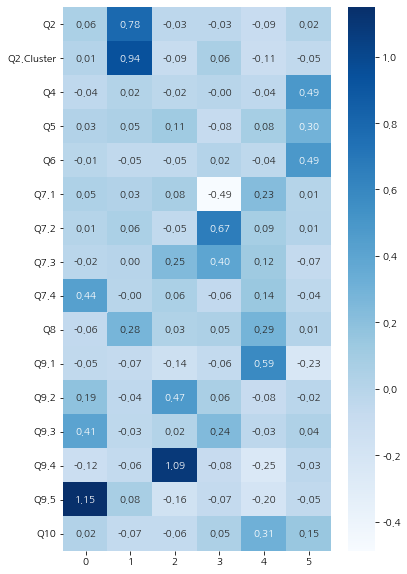

In [54]:
items = Q2.columns.tolist()
fa = FactorAnalyzer(n_factors=6, method="ml", rotation="promax")
fa.fit(Q2[items])

efa_result= pd.DataFrame(fa.loadings_, index=items)
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

groups = [[] for _ in range(6)]
for i in range(len(efa_result)):
    groups[np.argmax(efa_result.iloc[i])].append(efa_result.index[i])
for i, group in enumerate(groups):
    print(f'Group {i}:')
    print(group)

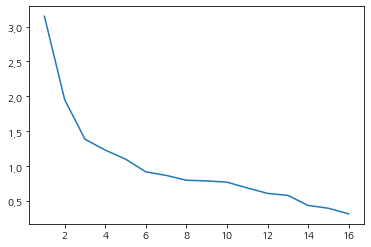

In [56]:
x = Q2.copy()
fa = FactorAnalyzer(6, method="ml", rotation="promax")
fa.fit(x)
efa = pd.DataFrame(fa.loadings_, index=x.columns)
#Eigenvalue Plotting
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)
plt.show()

In [57]:
new_Q2 = pd.DataFrame(fa.transform(x), columns=['Entertaining','Water_Activity','Own','With_Family','Fishing_Alone','Character'])
new_Q2.head()

,Entertaining,Water_Activity,Own,With_Family,Fishing_Alone,Character
0,0.695586,0.646742,0.808924,-0.263064,0.467018,3.418595
1,0.729948,0.575782,1.468832,0.589595,0.320798,0.769378
2,0.500458,0.565392,0.712959,-0.333501,0.093020,0.795421
3,-1.140026,0.586112,-0.215492,-0.616949,0.609455,0.551951
4,-0.518371,0.424146,-0.264416,-0.131743,-0.342173,0.536141


In [68]:
Q1_data = pd.read_csv('data.csv')
Q1_data.iloc[:, :5].head()

,Active,Achievement,Confidence,Tech,Basic
0,1.603504,1.925999,0.588489,2.312300,-1.403017
1,0.183254,1.290527,-0.175544,0.822054,-0.744389
2,-0.412127,1.290524,0.255103,1.639500,-1.675826
3,0.722554,0.272728,0.468732,1.946347,-0.437991
4,0.666488,1.556704,1.426527,1.788969,-0.697391


In [69]:
new_data = pd.concat([Q1_data.iloc[:, :5], data.iloc[:, 31:32], new_Q2, data.iloc[:, 46:]], axis=1)

In [70]:
new_data.to_csv('data_2.csv', index=False)